In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import collections
from matplotlib.animation import FFMpegWriter
from matplotlib import animation

from astropy import constants as const
from astropy import units as u

%matplotlib inline

In [6]:
from read_mist_models import EEP

# Initial Mass Function

$$\frac{dn}{dM} = kM^{-2.35}$$

n = star number density

M = mass

$$k = \text{local stellar density} \approx 0.14 \text{ stars} \text{ pc}^{-3}$$

See:
1. https://en.wikipedia.org/wiki/Stellar_density
2. https://en.wikipedia.org/wiki/Initial_mass_function#cite_note-6

In [7]:
k = 0.14

In [70]:
deltam = 0.1
starNumberDensities = []
sourceMasses = np.arange(.1,300,0.1)
for m in sourceMasses:
   # n = k*(1/1.35)*(-(m+deltam)**-1.35+m**-1.35)
    N = k*(m)**-0.75*(deltam)  # SHOULD BE -2.35
    starNumberDensities.append(N)

In [71]:
starDensitiesProb = np.array(starNumberDensities) / sum(starNumberDensities)
starDensitiesProb

array([3.82251406e-02, 2.27288046e-02, 1.67690380e-02, ...,
       9.43700171e-05, 9.43464079e-05, 9.43228125e-05])

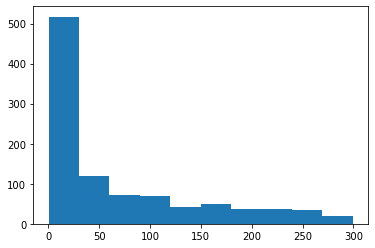

array([9.99999929e-02, 1.49999990e-01, 1.99999986e-01, 2.49999983e-01,
       2.99999979e-01, 3.09999979e-01, 3.19999978e-01, 3.29999977e-01,
       3.39999977e-01, 3.49999976e-01, 3.59999975e-01, 3.69999974e-01,
       3.79999974e-01, 3.89999973e-01, 3.99999972e-01, 4.49999969e-01,
       4.99999965e-01, 5.49999963e-01, 5.99999959e-01, 6.49999956e-01,
       6.99999952e-01, 7.49999950e-01, 7.99999945e-01, 8.49999942e-01,
       8.99999941e-01, 9.19999939e-01, 9.39999937e-01, 9.59999936e-01,
       9.79999934e-01, 9.99999932e-01, 1.01999993e+00, 1.03999993e+00,
       1.05999993e+00, 1.07999993e+00, 1.09999993e+00, 1.11999992e+00,
       1.13999992e+00, 1.15999992e+00, 1.17999992e+00, 1.19999992e+00,
       1.21999992e+00, 1.23999992e+00, 1.25999992e+00, 1.27999992e+00,
       1.29999991e+00, 1.31999991e+00, 1.33999991e+00, 1.35999991e+00,
       1.37999991e+00, 1.39999991e+00, 1.41999990e+00, 1.43999990e+00,
       1.45999990e+00, 1.47999990e+00, 1.49999990e+00, 1.51999990e+00,
      

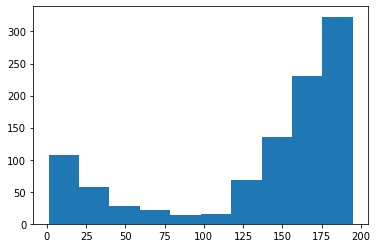

In [72]:
mass_low = 0.1
mass_high = 300

N_stars = 1000

masses = np.random.choice(sourceMasses, p=starDensitiesProb, size=N_stars)

plt.hist(masses)
plt.show()

availableInitialMasses = np.array([eep.eeps["star_mass"][0] for eep in eeps])
star_eep_idxs = [
    np.searchsorted(availableInitialMasses, mass)
    for mass in masses
]
plt.hist(star_eep_idxs)
availableInitialMasses
# Assume uniformly distributed masses for now
# masses = np.random.uniform(mass_low, mass_high, size=N_stars) * u.M_sun

# Mass-Luminosity Relation (MLR)
See: https://en.wikipedia.org/wiki/Mass%E2%80%93luminosity_relation


*   List item

*   List item

1.   List item

1.   List item
2.   List item


2.   List item


*   List item


*   List item


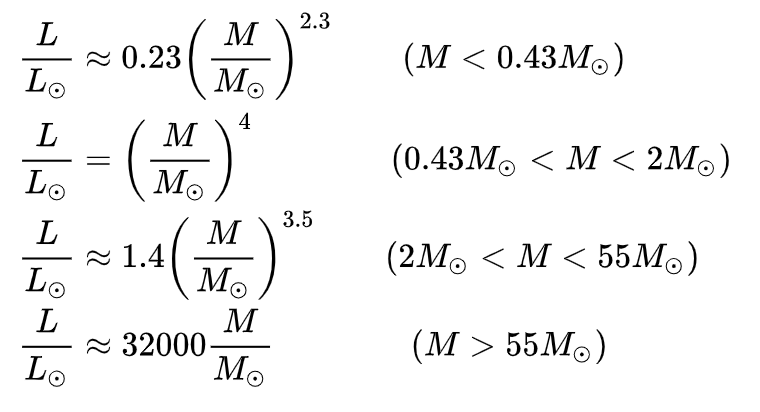

In [10]:
def mass_luminosity_relation(masses):
    """
    Use a for loop to loop through array of masses, then use the conditions
    above (with if statements) in order to compute the right luminosity in units
    of solar luminosity L_sun.
  ***M is in solar masses***
    """
    output = []
    for M in masses: #appends L of M
        if M < 0.43*const.M_sun:
          output.append(0.23*(M/const.M_sun)**2.3*const.L_sun) 
        elif M>0.43*const.M_sun and M<2*const.M_sun:
          output.append((M/const.M_sun)**4*const.L_sun)
        elif M>2*const.M_sun and M<55*const.M_sun:
          output.append(1.4*(M/const.M_sun)**3.4*const.L_sun)
        else:
          output.append(32000*(M/const.M_sun)*const.L_sun)
    return output
    """
    Parameters
    ==========
    masses : numpy array containing masses in units of solar masses

    Returns
    =======
    luminosities : numpy array containing predicted luminosities using the MLR
    """
print(mass_luminosity_relation(masses))


[<Quantity 476.02139213 solMass W / kg>, <Quantity 446.89579443 solMass W / kg>, <Quantity 1233.11485027 solMass W / kg>, <Quantity 1380.82803091 solMass W / kg>, <Quantity 455.588293 solMass W / kg>, <Quantity 3.95727883e-71 solMass(17/5) W / kg(17/5)>, <Quantity 1.18208101e-72 solMass(17/5) W / kg(17/5)>, <Quantity 1232.71472238 solMass W / kg>, <Quantity 5.00897033e-72 solMass(17/5) W / kg(17/5)>, <Quantity 1420.85919901 solMass W / kg>, <Quantity 7.90629932e-73 solMass(17/5) W / kg(17/5)>, <Quantity 1682.76620482 solMass W / kg>, <Quantity 1.17259327e-73 solMass(17/5) W / kg(17/5)>, <Quantity 1594.5143809 solMass W / kg>, <Quantity 1338.05399357 solMass W / kg>, <Quantity 794.70217686 solMass W / kg>, <Quantity 1555.68165748 solMass W / kg>, <Quantity 1.52171942e-72 solMass(17/5) W / kg(17/5)>, <Quantity 1343.55411021 solMass W / kg>, <Quantity 1188.6543459 solMass W / kg>, <Quantity 1045.94510237 solMass W / kg>, <Quantity 578.94366271 solMass W / kg>, <Quantity 1656.80189127 solM

## Load EEP track models

In [11]:
import os
import glob

sorted_model_filenames = sorted(
    list(glob.iglob("MIST_models/*.track.eep")),
    key=lambda filename: int(filename.split("/")[-1].split("M")[0])
)
eeps = [EEP(filename) for filename in sorted_model_filenames]

Reading in: MIST_models/00010M.track.eep
Reading in: MIST_models/00015M.track.eep
Reading in: MIST_models/00020M.track.eep
Reading in: MIST_models/00025M.track.eep
Reading in: MIST_models/00030M.track.eep
Reading in: MIST_models/00031M.track.eep
Reading in: MIST_models/00032M.track.eep
Reading in: MIST_models/00033M.track.eep
Reading in: MIST_models/00034M.track.eep
Reading in: MIST_models/00035M.track.eep
Reading in: MIST_models/00036M.track.eep
Reading in: MIST_models/00037M.track.eep
Reading in: MIST_models/00038M.track.eep
Reading in: MIST_models/00039M.track.eep
Reading in: MIST_models/00040M.track.eep
Reading in: MIST_models/00045M.track.eep
Reading in: MIST_models/00050M.track.eep
Reading in: MIST_models/00055M.track.eep
Reading in: MIST_models/00060M.track.eep
Reading in: MIST_models/00065M.track.eep
Reading in: MIST_models/00070M.track.eep
Reading in: MIST_models/00075M.track.eep
Reading in: MIST_models/00080M.track.eep
Reading in: MIST_models/00085M.track.eep
Reading in: MIST

In [66]:
eeps[0].eeps["star_mass"][0]

0.09999999290916796

(array([15119.,  3208.,  1861.,  1303.,  1015.,   827.,   703.,   615.,
          526.,   501.]),
 array([8.58691317e+01, 1.00772534e+04, 2.00686377e+04, 3.00600219e+04,
        4.00514062e+04, 5.00427904e+04, 6.00341747e+04, 7.00255590e+04,
        8.00169432e+04, 9.00083275e+04, 9.99997117e+04]),
 <BarContainer object of 10 artists>)

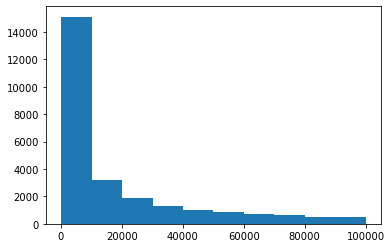

In [12]:
# Make an interpolated common time scale (common X ticks)
star_ages_union = np.array(sorted(list(set(np.concatenate([eep.eeps["star_age"] for eep in eeps])))))
plt.hist(star_ages_union[star_ages_union < 1e5])

In [73]:
age_gaps = np.array([
    np.mean(np.array(eep.eeps["star_age"])[1:] - np.array(eep.eeps["star_age"])[:-1])
    for eep in eeps
])

# Calculate min/max star ages, which is the full range that we need to animate
# min_age = np.floor(np.min([np.min(eep.eeps["star_age"]) for eep in eeps]))
min_age = 50
# max_age = np.floor(np.max([np.max(eep.eeps["star_age"]) for eep in eeps]))
max_age = 1e10

n_frames = 500

log_delta_age = (np.log(max_age) - np.log(min_age)) / n_frames
delta_age = (max_age - min_age) // n_frames

In [74]:
ages = np.arange(min_age, max_age, delta_age)
log_ages = np.arange(np.log(min_age), np.log(max_age), log_delta_age)

In [113]:
def linear_interpolate(alpha, a, b):
    return alpha * a + (1 - alpha) * b

def get_data_for_age(eeps, star_eep_idxs, star_age):
    data = collections.defaultdict(dict)
    i = 0
#     for eep in eeps:
    for i, star_eep_idx in enumerate(star_eep_idxs):
        eep = eeps[star_eep_idx]
        star_ages = eep.eeps["star_age"]
        closest_idx = np.clip(np.searchsorted(star_ages, star_age), 0, len(star_ages) - 1)  
#         print(f"Star_age: {star_age}, eep_idx: {i}, closest idx: {closest_idx}, tot_len: {len(star_ages) - 1}, closest age: {star_ages[closest_idx]}")
        i += 1
        if ((closest_idx == 0 and star_age < star_ages[closest_idx])
            or (closest_idx == len(star_ages) - 1 and star_age > star_ages[closest_idx])):
            Teff = eep.eeps['log_Teff'][closest_idx]
            L = eep.eeps['log_L'][closest_idx]
            M = round(eep.eeps['star_mass'][closest_idx], 1)
            R = eep.eeps['log_R'][closest_idx]
            
        elif closest_idx < len(star_ages) - 1 and star_age:
            # Linearly interpolate between the two closest points
            star_age_left = star_ages[closest_idx]
            star_age_right = star_ages[closest_idx + 1]

            frac_between = (star_age - star_age_left) / (star_age_right - star_age_left)

            Teff_left = eep.eeps['log_Teff'][closest_idx]
            Teff_right = eep.eeps['log_Teff'][closest_idx + 1]
            L_left = eep.eeps['log_L'][closest_idx]
            L_right = eep.eeps['log_L'][closest_idx + 1]
            M_left = eep.eeps['star_mass'][closest_idx]
            M_right = eep.eeps['star_mass'][closest_idx + 1]
            R_left = eep.eeps['log_R'][closest_idx]
            R_right = eep.eeps['log_R'][closest_idx + 1]
            
            Teff = linear_interpolate(frac_between, Teff_left, Teff_right)
            L = linear_interpolate(frac_between, L_left, L_right)
            M = linear_interpolate(frac_between, M_left, M_right)
            M = round(M, 1)
            R = linear_interpolate(frac_between, R_left, R_right)
    
        Teff_std = np.std(eep.eeps['log_Teff'])
        L_std = np.std(eep.eeps['log_L'])
            
        data[i]["Teff"] = Teff + np.random.normal(0, 0.01)
        data[i]["L"] = L + np.random.normal(0, 0.05)
        data[i]["M"] = M
        data[i]["R"] = R

    return data

def parse_data_dict(data):
    Ls = np.array([data[idx]["L"] for idx in data])
    Teffs = np.array([data[idx]["Teff"] for idx in data])
    Ms = np.array([data[idx]["M"] for idx in data])
    Rs = np.array([data[idx]["R"] for idx in data])

    return Teffs, Ls, Ms, Rs

def abbreviate(x):
    abbreviations = ["", "K", "M", "B", "T", "Qd", "Qn", "Sx", "Sp", "O", "N", "De", "Ud", "DD"]
    thing = "1"
    a = 0
    while len(thing) < len(str(x)) - 3:
        thing += "000"
        a += 1
    b = int(thing)
    thing = round(x / b, 2)
    return str(thing) + " " + abbreviations[a]

In [118]:
data = get_data_for_age(eeps, star_eep_idxs, log_ages[0])
Teffs, Ls, Ms, Rs = parse_data_dict(data)
(Rs)

array([ 1.9642176 , 12.09083584,  5.13553868, 13.14219797, 13.84274712,
        6.25142882, 13.84274712, 11.99345658,  4.68485249,  4.76827443,
        4.97466181,  6.71422852,  4.76827443,  2.51129017,  4.97466181,
        8.23906213, 13.33771465,  4.76827443,  4.97466181, 12.12585189,
        3.64110771,  3.51691202, 11.7946546 ,  4.68485249,  4.97466181,
        4.93728825,  5.13553868,  7.03369495,  8.4652639 ,  5.3923681 ,
        1.43926159, 11.99345658, 13.12964817, 13.14219797,  2.3038082 ,
        8.01005416,  5.20616293,  6.46493662,  4.8869495 ,  9.29685263,
        2.86645049,  9.05158322,  6.14290329,  1.79234732,  6.46493662,
        5.54869069,  4.89875697,  6.93292677,  2.3038082 ,  9.81259863,
        8.4652639 ,  6.44535452,  3.39688448,  9.5636283 ,  5.3923681 ,
        4.44662776,  9.81259863,  1.43926159,  4.76827443,  3.26123536,
       13.84274712,  7.76638611,  4.68485249,  4.26249761,  6.25142882,
        2.86645049,  2.3038082 ,  6.02894489,  9.29685263,  7.03

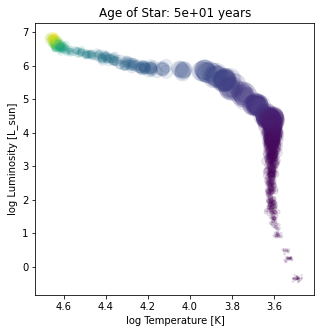

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [123]:
# Initilize writer 
metadata = dict(title='2D animation', artist='Matplotlib')
writer = FFMpegWriter(fps=24, metadata=metadata, bitrate=200000)

## SAVE AS MP4 ##
fig, ax = plt.subplots(figsize=(5,5))

with writer.saving(fig, "test2.mp4", dpi=200):
    for log_star_age in log_ages:
        ax.clear() # first clear the figure

        ax.set_xlabel('log Temperature [K]')
        ax.set_ylabel('log Luminosity [L_sun]')
#         ax.set_title(f"Age of Star: {abbreviate(int(np.exp(log_star_age)))} years")
        ax.set_title("Age of Star: {:.0e} years".format(np.exp(log_star_age)))

        star_age = np.exp(log_star_age)
        data = get_data_for_age(eeps, star_eep_idxs, star_age)

        Teffs, Ls, Ms, Rs = parse_data_dict(data)
        ax.scatter(Teffs, Ls, s=10**Rs, c=Ms, alpha=0.1)
        ax.invert_xaxis()

        plt.draw()
        plt.pause(0.005)

        writer.grab_frame() # save the current frame to mp4

In [19]:
len(star_ages_union)

253718

In [20]:
eep.eeps["star_mass"]

NameError: name 'eep' is not defined

In [ ]:
eep.eeps["star_age"]

In [21]:
np.where(eep.eeps["star_age"] == eep.eeps["star_age"][0])[0].item()

NameError: name 'eep' is not defined